# 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
df_train = pd.read_csv('SalaryData_Train.csv')

In [31]:
df_test= pd.read_csv('SalaryData_Test.csv')

In [32]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [34]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [35]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [36]:
df_train.value_counts('education')

education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

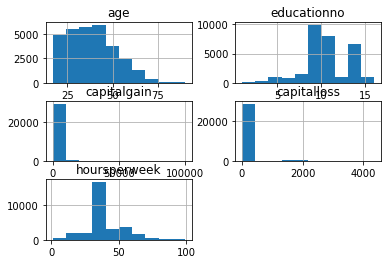

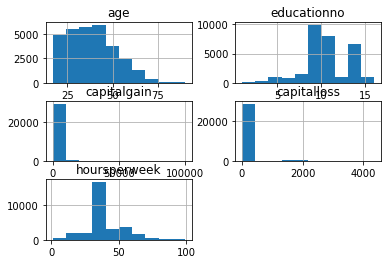

In [37]:
df_train.hist()
df_train.hist(bins=10)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

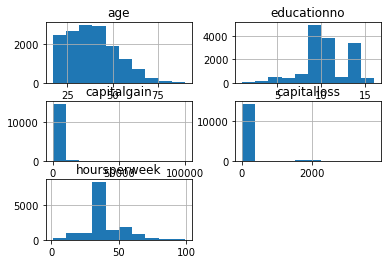

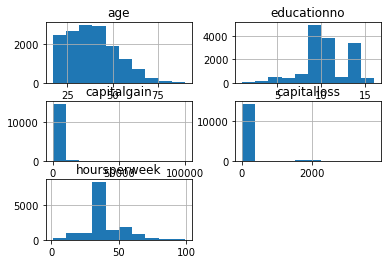

In [38]:
df_test.hist()
df_test.hist(bins=10)

<AxesSubplot:>

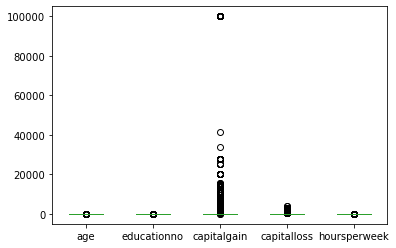

In [39]:
df_test.plot.box()

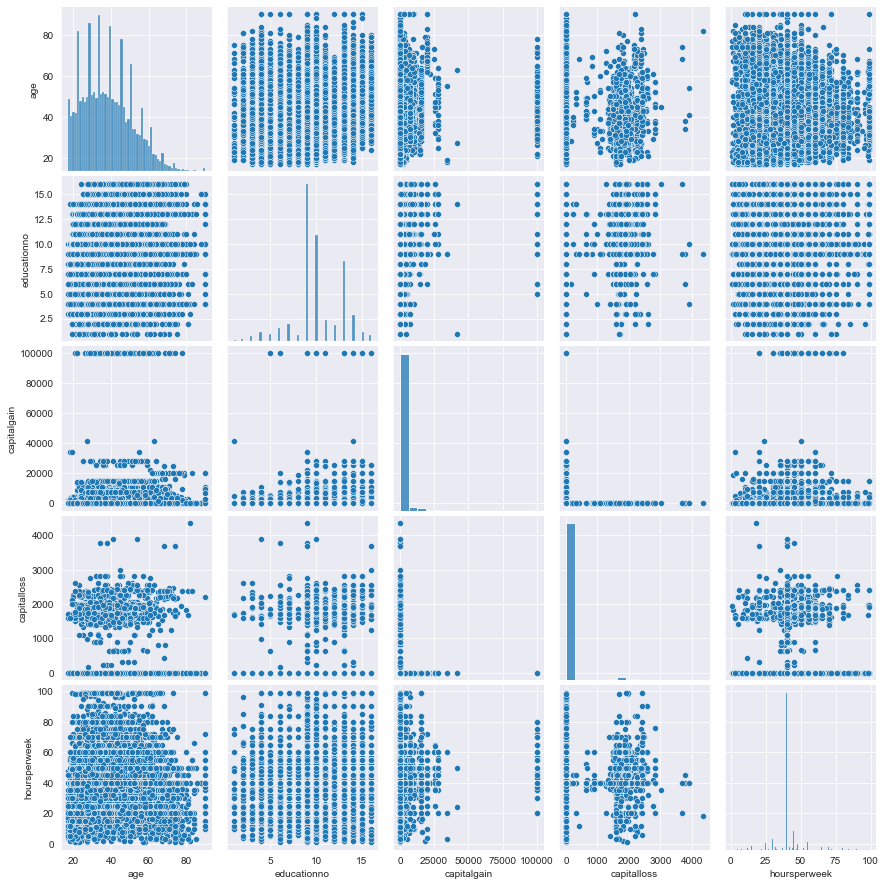

In [41]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df_train)

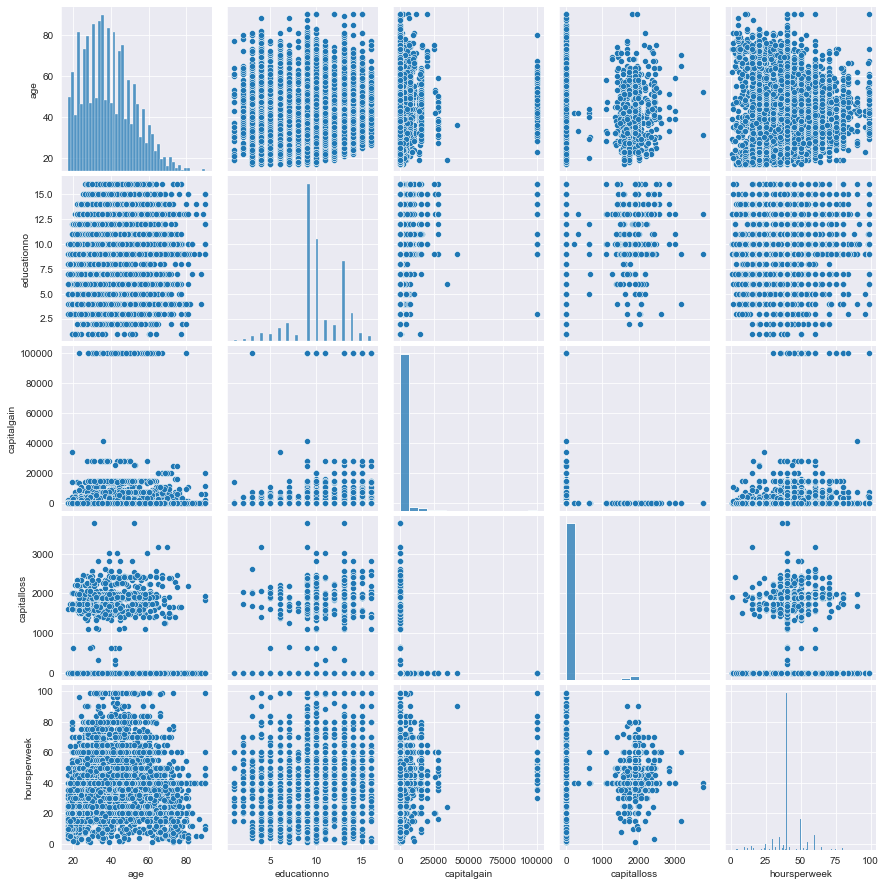

In [42]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df_test)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Salary']=le.fit_transform(df_train['Salary'])
df_test['Salary']=le.fit_transform(df_test['Salary'])

In [44]:
df_test1=pd.get_dummies(df_test)
df_train1=pd.get_dummies(df_train)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train=df_train1.drop('Salary',axis=1)
y_test=df_test1.iloc[:,-1:]
x_test=df_test1.drop('Salary',axis=1)
y_train=df_train1.iloc[:,-1:]

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [48]:
classifier.score(x_test,y_test)

0.9828021248339973

In [49]:
#prediction
pred=classifier.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14794
           1       1.00      0.03      0.05       266

    accuracy                           0.98     15060
   macro avg       0.99      0.51      0.52     15060
weighted avg       0.98      0.98      0.97     15060

